<a href="https://colab.research.google.com/github/KIMDOKYOUNG/DeepLearning/blob/master/chapter5/chapter_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## 밑바닥부터 시작하는 딥러닝 1 뽀개기
#### CHAPTER 5 오차역전파법 
#### 일자 : 2020-08-16

- 수치미분은 구현이 쉽지만 계산 시간이 오래걸린다. 
- 가중치 매개변수의 기울기를 효율적으로 계산하는 오차역전파법!

---

## 덧셈, 곱셈의 역전파 => 계산 그래프를 사용해서 계산 과정을 보면 쉽다. 

- 덧셈의 역전파에서는 상류의 값을 그대로 흘려보내서 순방향 입력 신호의 값이 필요하지 않다.
- 곱섬의 역전파는 상류의 값에 순방향 입력 신호를 서로 바꿔서 곱한 값을 흘려보낸다.  

## 계산 그래프 
- 가격이 100원인 사과를 2개 사고 소비세가 10% 부과될 때 지불 금액은?
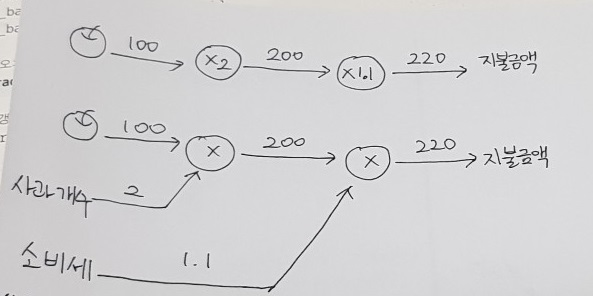

- 사과 2개, 귤 3개를 구매, 사과는 1개에 100원, 귤을 1개에 150원이고 소비세 10%가 붙을 때 지불 금액을 계산 그래프로 나타내면!

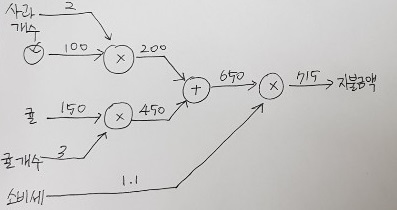

## 국소적 계산
- 계산 그래프의 특징은 자신과 직접 관계된 작은 범위(국소적)의 계산을 전파함으로써 최종 결과를 얻는다. 

## 계산 그래프를 사용하는 이유??
- 역전파를 통해 '미분'(기울기)를 효율적으로 계산할 수 있다! 
- 역전파는 국소적인 미분을 순방향과는 반대인 오른쪽에서 왼쪽으로 전달한다. 
  - 연쇄법칙(Chain rule)을 따른다

## 계산 그래프의 역전파 
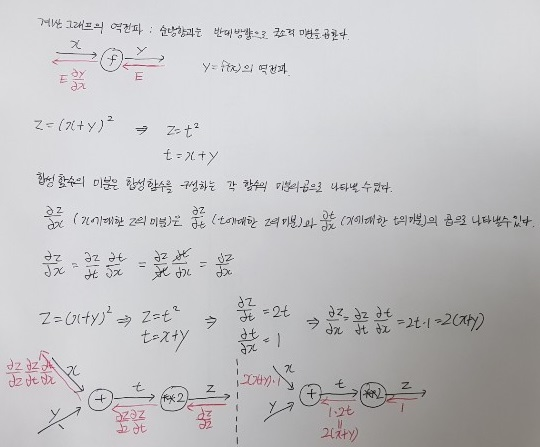


- 노드로 들어온 입력 신호에 그 노드의 국소적 미분(편미분)을 곱한 다음 다음 노드로 전달한다. 
  - 
- 위의 사진에서 볼 수 있듯이 연쇄법칙을 통해서 역전파를 나타낼 수 있다.

---

## 덧셈 노드의 역전파 & 곱셈 노드의 역전파
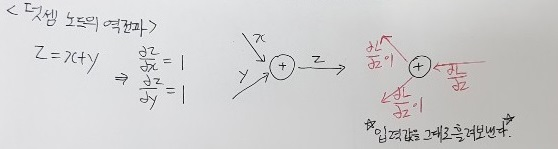

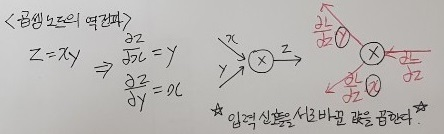

- 덧셈 노드의 역전파
  - 덧셈 노드의 역전파는 z = x+y의 편미분을 했을 때 둘다 1이 나와서 상류의 값에 1을 곱하는 것이므로 입력값(상류값)을 그대로 흘려보내는 것과 같다
- 곱셈 노드의 역전파
  - 곱셈 노드의 역전파는 z = xy의 편미분을 했을 때 x에 대한 z의 미분은 y가 나오고, y에 대한 z의 미분은 x가 나오므로 서로 바꾼 값이 나온 것을 알 수 있다. 
  - 그래서 상류값에 입력 신호들을 서로 바꾼 값을 곱해서 하류로 흘려 보낸다. 
  ---
  
위에서 다뤘던 사과를 사는 문제와 사과와 귤을 사는 문제에 대한 역전파를 계산 해보면 아래와 같다! 

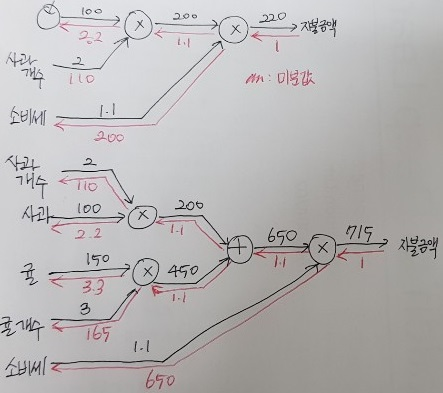

- 소비세의 미분은 200, 사과 가격의 미분은 2.2이다. 
- 소비세와 사과 가격이 같은 양만큼 오르면 최종금액에는 소비세가 200의 크기로, 사과 가격이 2.2의 크기로 영향을 준다고 해석 할 수 있다. 
## 아래 부분에서는 코드로 위의 계산을 구현해보자! 

## 곱셈 계층 


In [ ]:
class MulLayer:
  
  def __init(self):
    self.x = none
    self.y = none
  
  def forward(self,x,y):
    self.x = x
    self.y = y
    out = x * y

    return out
  
  def backward(self, d_out): # 상류의 값(미분 값)에 순방향 입력 신호를 서로 바꿔서 곱한 값을 흘려보낸다. 
    d_x = d_out * self.y
    d_y = d_out * self.x

    return d_x, d_y 


## 곱셈 계층 순전파 

In [ ]:
apple = 100
apple_num = 2
tax = 1.1

mul_apple_layer = MulLayer()
mul_tax_layer = MulLayer()

apple_price = mul_apple_layer.forward(apple,apple_num)
price = mul_tax_layer.forward(apple_price, tax)

print(apple_price)
print(price)

200
220.00000000000003


## 곱셈 계층 역전파 

In [ ]:
dprice = 1

dapple_price, dtax = mul_tax_layer.backward(dprice)
dapple, dapple_num = mul_apple_layer.backward(dapple_price)

print(dapple, dapple_num, dtax)

2.2 110.00000000000001 200


## 덧셈 계층

In [ ]:
class AddLayer:

  def __init__(self):
    pass

  def forward(self,x,y):
    out = x + y
    return out

  def backward(self, d_out):
    d_x = d_out * 1
    d_y = d_out * 1
    return d_x, d_y

## 사과 2개 귤 3개 사는 상황 구현 

In [ ]:
apple = 100
apple_num = 2
orange = 150
orange_num = 3
tax = 1.1

dprice = 1

mul_apple_layer = MulLayer()
mul_orange_layer = MulLayer()
mul_tax_layer = MulLayer()
add_apple_orange_layer = AddLayer()

apple_price = mul_apple_layer.forward(apple,apple_num)
orange_price = mul_orange_layer.forward(orange,orange_num)
fruit_price = add_apple_orange_layer.forward(apple_price, orange_price)
price = mul_tax_layer.forward(fruit_price, tax)

print("**** 순전파 ****\n")
print("apple_price : {} \n orange_price : {} \n fruit_price : {} \n price : {}\n".format(apple_price, orange_price, fruit_price, price))


dfruit_price, dtax = mul_tax_layer.backward(dprice)
dapple_price, dorange_price = add_apple_orange_layer.backward(dfruit_price)
dapple, dapple_num = mul_apple_layer.backward(dapple_price)
dorange, dorange_num = mul_orange_layer.backward(dorange_price)
print("**** 역전파 ****\n")
print("dapple : {} \n dapple_num : {} \n dapple_price : {} \n dorange : {} \n dorange_num : {} \n dorange_price : {} \n dfruit_price : {} \n dprice : {}".format(dapple, dapple_num ,dapple_price, dorange, dorange_num, dorange_price, dfruit_price, dprice))



**** 순전파 ****

apple_price : 200 
 orange_price : 450 
 fruit_price : 650 
 price : 715.0000000000001

**** 역전파 ****

dapple : 2.2 
 dapple_num : 110.00000000000001 
 dapple_price : 1.1 
 dorange : 3.3000000000000003 
 dorange_num : 165.0 
 dorange_price : 1.1 
 dfruit_price : 1.1 
 dprice : 1


## 활성화 함수 계층 구현하기 

### 1. ReLU 계층 
- ReLU 순전파
  - 입력인 x가 0보다 크면 x가 그대로 전달되고, 0보다 작으면 전달 되지 않는다. (0이 전달 되는 것과 같다) 
- ReLU 역전파  
  - 순전파 때의 입력인 x가 0보다 크면 상류의 값을 그대로 하류로 흘린다. 
  - 순전파 때 x가 0 이하면 역전파 때는 하류로 신호를 보내지 않는다. 

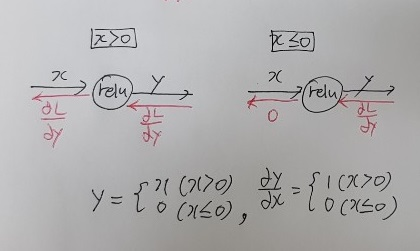

In [ ]:
class ReLU:
  def __init__(self):
    self.x = none
  
  def forward(self, x):
    self.x = x
    
    return self.x
  
  def backward(self, d_out):
    if self.x > 0:
      return 1
    else :
      return 0

내가 생각했던 코드... 하지만 어딘가 이상하다 

masking을 해야 된다! 

In [ ]:
import  numpy as np 

x = np.array([[1.0,-0.5],[-2.0, 3.0]])
print(x)

mask = (x <= 0)
print(mask)


[[ 1.  -0.5]
 [-2.   3. ]]
[[False  True]
 [ True False]]


In [ ]:
x[mask] = 0

In [ ]:
x

array([[1., 0.],
       [0., 3.]])


  - True가 0이 된다. 즉, 0보다 작은 수가 0이 된다.
  - masking을 해서 0보다 작은 수를 0으로 만들고 0보다 큰 수를 1로 만든다. 

In [ ]:
class ReLU:
  def __init__(self):
    self.mask = none # 초기화 시켜주기 
  
  def forward(self, x):
    self.mask = (x <= 0)
    out = x.copy()
    out[maxk] = 0

    return out
  
  def backward(self, d_out):
    d_out[self.mask] = 0
    d_x = d_out

    return d_x

## Sigmoid 계층 

- 순전파와 역전파를 직접 계산 그래프를 그리면 더 이해하기 쉽다. 
- 총 4번의 과정을 거쳐서 나온다. 

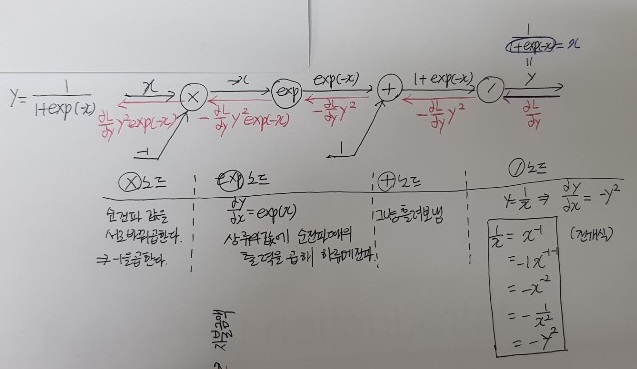

- sigmoid 계산을 할때 중간 과정을 하나씩 다 안 계산해도 한번에 순전파의 출력만을 가지고 계산할 수 있다. 

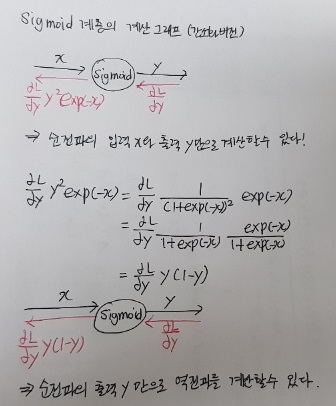

아래의 코드는 순전파의 출력 y만으로 역전파를 계산하는 코드이다. 


In [ ]:
class Sigmoid:

  def __init__(self):
    self.out = None
  
  def forward(self, x):
    self.out = 1 / (1 + np.exp(-x))

    return self.out
  
  def backward(self, d_out):
    d_x = d_out * (1 - self.out) * self.out

    return d_x

- 순전파의 출력을 변수 out에 저장해서 역전파를 계산할 때 사용한다. 

## Affine/Softmax 계층 구현하기

---

## Affine 계층 

- 신경망의 순전파 때 수행하는 행렬의 내적을 affine transformation이라고 한다. 

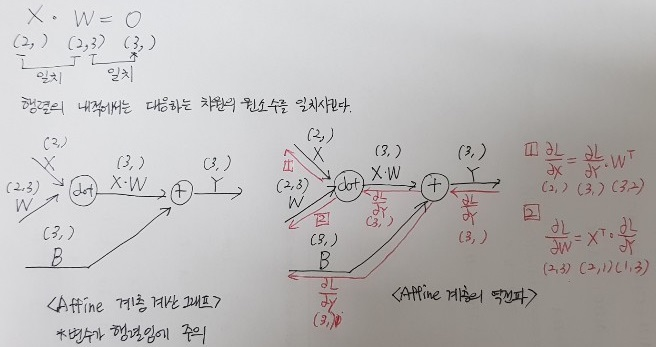

In [ ]:
X = np.random.rand(2) 
W = np.random.rand(2,3)
B = np.random.rand(3)

print('X.shape :',X.shape)
print('W.shape :',W.shape)
print('B.shape :',B.shape)

Y = np.dot(X,W) + B
print('Y.shape :',Y.shape)

X.shape : (2,)
W.shape : (2, 3)
B.shape : (3,)
Y.shape : (3,)


## 배치용 Affine 계층 
- 순전파의 편향 덧셈은 각각의 원소에 더해진다.
- 역전파의 경우 각 데이터의 역전파 값이 평향의 원소에 모여야된다. 열방향 (axis = 0)에 대해서 총합을 구한다.

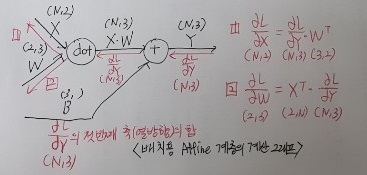

In [ ]:
dY = np.array([[1,2,3],[4,5,6]])
dY

array([[1, 2, 3],
       [4, 5, 6]])

In [ ]:
dB = np.sum(dY,axis = 0)
dB

array([5, 7, 9])

편향을 다시 (3,)로 만들어야 다시 순전파를 할때 사용할 수 있다. 

In [ ]:
class Affine:

  def __init__(self,W,b):

    self.W = W
    self.b = b
    self.x = None
    self.dW = None
    self.db = None
  
  def forward(self,x):
    self.x = x
    out = np.dot(x,self.W) + self.b
    return out

  def backward(self,d_out):

    d_x = np.dot(d_out,self.W.T)
    self.dW = np.dot(self.x.T,d_out)
    self.db = np.sum(d_out, axis = 0) # 역전파 값인 d_out가 열방향으로 모여서 편향이 된다. 

    return d_x


하지만 위의 식은 4차원 데이터(텐서)인 경우는 고려하지 않았다. 

In [ ]:
x = np.array([[[[1,2,3],[2,3,4],[3,4,5]],[[1,2,3],[2,3,4],[3,4,5]]]])
x.shape

(1, 2, 3, 3)

In [ ]:
x1 = x.reshape(x.shape[0],-1)
x1.shape

(1, 18)

## Softmax_with_Loss 계층



In [ ]:
class ReLU:
  
  def __init__(self):
    self.mask = None
  
  def forward(self,x):
    self.mask = (x <= 0)
    out = x.copy()
    out[self.mask] = 0

    return out
  
  def backward(self, d_out):
    d_out[self.mask] = 0
    d_x = d_out

    return d_x

In [ ]:
def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T 

    x = x - np.max(x) # 오버플로 대책
    return np.exp(x) / np.sum(np.exp(x))


In [ ]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    # 훈련 데이터가 원-핫 벡터라면 정답 레이블의 인덱스로 반환
    if t.size == y.size:
        t = t.argmax(axis=1)
             
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

In [ ]:
class SoftmaxWithLoss:
  def _init__(self):
    self.loss = None # 손실
    self.y = None # softmax의 출력 
    self.t = None # 원핫인코딩 된 정답 레이블! 
  
  def forward(self,x,t):
    self.t = t
    self.y = softmax(x)
    self.loss = cross_entropy_error(self.y,self.t) # cross_entropy_error를 통해서 loss값을 구한다. 
    return self.loss

  def backward(self,dout=1):
    batch_size = self.t.shape[0]
    if self.t.size == self.y.size: # 정답 레이블이 원-핫 인코딩 형태일 때
        dx = (self.y - self.t) / batch_size
    else:
        dx = self.y.copy()
        dx[np.arange(batch_size), self.t] -= 1
        dx = dx / batch_size
    
    return dx

  

## 오차역전파법을 적용한 신경망 구현하기 

In [ ]:
class TwoLayerNet:
  def __init__(self, input_size, hidden_size, output_size, weight_init_std = 0.01):
    # 가중치 초기화
    self.params = {}
    self.params['W1']  = weight_init_std * np.random.randn(input_size, hidden_size)
    self.params['b1'] = np.zeros(hidden_size)
    self.params['W2']  = weight_init_std * np.random.randn(hidden_size, output_size)
    self.params['b2'] = np.zeros(output_size)

    # 계층 생성 
    self.layers = {} # 딕셔너리에 넣기, 지금은 OrderedDict을 안써도 똑같이 나온다. 
    self.layers['Affine1'] = Affine(self.params['W1'], self.params['b1'])
    self.layers['ReLU'] = ReLU()
    self.layers['Affine2'] = Affine(self.params['W2'], self.params['b2'])

    self.lastLayer = SoftmaxWithLoss()

  def predict(self,x):
    for layer in self.layers.values():
      x = layer.forward(x)

    return x

  def loss (self,x,t):
    y = self.predict(x)
    
    return self.lastLayer.forward(y,t) # SoftmaxWithLoss의 forward안에 cross_entropy_error를 거쳐 loss가 나온다.
  
  def accuracy(self, x, t):
    y = self.predict(x)
    y = np.argmax(y, axis = 1)
    print(y)
    if t.ndim != 1 : t = np.argmax(t, axis = 1)

    accuracy = np.sum(y == t)/ float(x.shape[0]) # 배치 사이즈로 나눠준다. 
    
    return accuracy

  
  
  def numerical_gradient(self, x, t):
    loss_W = lambda W: self.loss(x,t)

    grads = {}
    grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
    grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
    grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
    grads['b2'] = numerical_gradient(loss_W, self.params['b2'])

    return grads

  def gradient(self,x,t):

    self.loss(x,t)

    # 역전파 
    d_out = 1
    d_out = self.lastLayer.backward(d_out)

    layers = list(self.layers.values())
    layers.reverse()
    for layer in layers:
      d_out = layer.backward(d_out)
    
    grads = {}
    grads['W1'], grads['b1'] = self.layers['Affine1'].dW, self.layers['Affine1'].db
    grads['W2'], grads['b2'] = self.layers['Affine2'].dW, self.layers['Affine2'].db

    return grads 



In [ ]:
def _numerical_gradient_no_batch(f,x):

  h = 1e-4
  grad = np.zeros_like(x) # 여기에 각 변수들의 grad를 넣을 수 있게 x와 shape이 같은 배열 생성 

  for idx in range(x.size):
    temp = x[idx]
    x[idx] = float(temp) + h
    fxh1 = f(x)
    x[idx] = temp -h 
    fxh2 = f(x)
    grad[idx] = (fxh1-fxh2)/ (2*h)
    x[idx] = temp
  
  return grad 



In [ ]:
def numerical_gradient(f,X):
  if X.ndim == 1:
    return _numerical_gradient_no_batch(f,X)
  else : 
    grad = np.zeros_like(X)

    for idx, x in enumerate(X):
      grad[idx] = _numerical_gradient_no_batch(f,x)
    
    return grad

In [ ]:
a = [1,2,3]
a.reverse()
print(a)

[3, 2, 1]


In [ ]:
from mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize = True)

network = TwoLayerNet(input_size=784, hidden_size= 50, output_size=10)

x_batch = x_train[:3]
t_batch = t_train[:3]

grad_numerical = network.numerical_gradient(x_batch, t_batch)
grad_backprop = network.gradient(x_batch, t_batch)

for key in grad_numerical.keys():
  diff = np.average(np.abs(grad_backprop[key] - grad_numerical[key]))
  print(key + ":"+str(diff))

W1:3.321387254979375e-10
b1:2.3090291293104352e-09
W2:4.095204740833574e-09
b2:1.399723953604548e-07


## 오차역전파법을 사용한 학습 구현하기 

In [ ]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch) # 수치 미분 방식
    grad = network.gradient(x_batch, t_batch) # 오차역전파법 방식(훨씬 빠르다)
    
    # 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print(train_acc, test_acc)


[9 0 2 ... 9 2 9]
[9 2 2 ... 9 9 9]
0.12613333333333332 0.1314
[3 0 4 ... 5 6 8]
[7 2 1 ... 4 5 6]
0.9068666666666667 0.9104
[5 0 4 ... 5 6 8]
[7 2 1 ... 4 5 6]
0.9248 0.9272
[5 0 4 ... 5 6 8]
[7 2 1 ... 4 5 6]
0.9374 0.9376
[5 0 4 ... 5 6 8]
[7 2 1 ... 4 5 6]
0.9455666666666667 0.944
[5 0 4 ... 5 6 8]
[7 2 1 ... 4 5 6]
0.95185 0.9512
[5 0 4 ... 5 6 8]
[7 2 1 ... 4 5 6]
0.9570333333333333 0.9553
[5 0 4 ... 5 6 8]
[7 2 1 ... 4 5 6]
0.96215 0.9573
[5 0 4 ... 5 6 8]
[7 2 1 ... 4 5 6]
0.96495 0.9626
[5 0 4 ... 5 6 8]
[7 2 1 ... 4 5 6]
0.9677833333333333 0.9643
[5 0 4 ... 5 6 8]
[7 2 1 ... 4 5 6]
0.96945 0.9644
[5 0 4 ... 5 6 8]
[7 2 1 ... 4 5 6]
0.9713166666666667 0.9652
[5 0 4 ... 5 6 8]
[7 2 1 ... 4 5 6]
0.9736333333333334 0.9662
[5 0 4 ... 5 6 8]
[7 2 1 ... 4 5 6]
0.9737666666666667 0.9671
[5 0 4 ... 5 6 8]
[7 2 1 ... 4 5 6]
0.9767333333333333 0.9694
[5 0 4 ... 5 6 8]
[7 2 1 ... 4 5 6]
0.9776333333333334 0.9684
[5 0 4 ... 5 6 8]
[7 2 1 ... 4 5 6]
0.9791 0.9721


정확도가 점점 올라가는 것을 볼 수 있다! 

이로써 오차역전파법을 사용해서 신경망 학습이 잘 된 것을 알 수 있다! 